In [141]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split


In [142]:
credit= pd.read_csv('default of credit card clients.csv',header =1)

In [143]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [144]:
credit.describe().dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [145]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [146]:
credit.rename(columns={'default payment next month':'default'},inplace=True)

In [147]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [148]:
credit.groupby(['SEX','default'])['SEX'].count()

SEX  default
1    0           9015
     1           2873
2    0          14349
     1           3763
Name: SEX, dtype: int64

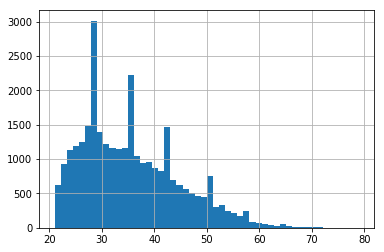

In [149]:
credit['AGE'].hist(bins=50)

In [150]:
def male_female_child(sex):
    #sex = passenger
    
    if sex == 1:
        return 'male'
    else:
        return 'female'

In [151]:
credit['gender'] = credit['SEX'].apply(male_female_child)

In [152]:
credit[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,gender
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,female
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,female
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,female
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,female
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,male
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,male
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,male
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,female
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,female
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,male


In [153]:
credit.groupby(['gender','default'])['SEX'].count()

gender  default
female  0          14349
        1           3763
male    0           9015
        1           2873
Name: SEX, dtype: int64

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


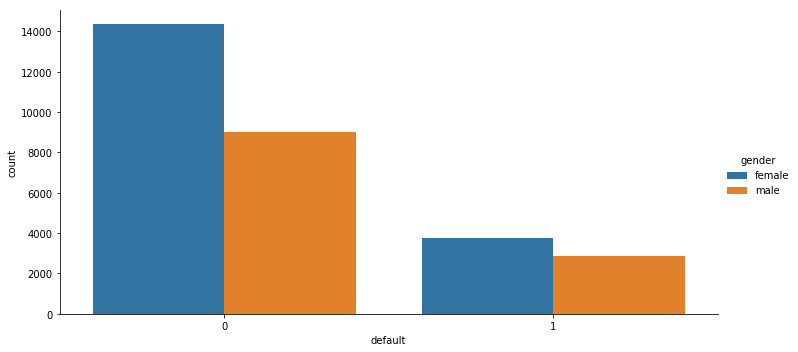

In [154]:
sns.factorplot('default', data=credit, kind='count', hue='gender', order=[0,1], 
               hue_order=['female','male'], aspect=2)

C:\Software\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


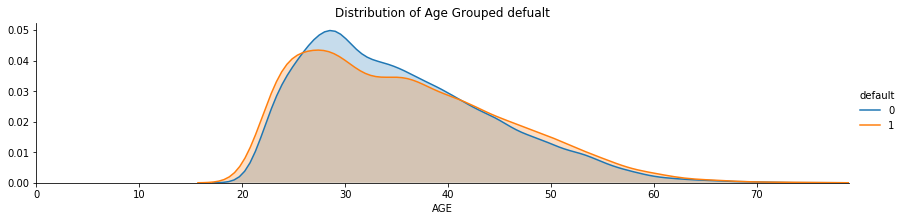

In [155]:
fig = sns.FacetGrid(credit, hue='default', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped defualt')
fig.add_legend()

In [156]:
bin = [10,20,30,40,50,60,70]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(credit.AGE,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
credit_new = pd.concat([credit,category],axis = 1)

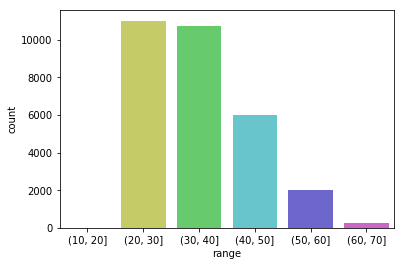

In [157]:
sns.countplot(x = 'range', data = credit_new, palette = 'hls')
plt.show()

In [158]:
credit_default = credit_new.drop(['ID','SEX','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
],axis=1)

In [174]:
def male_female_child(sex):
    #sex = passenger
    
    if sex == 'male':
        return '1'
    else:
        return '0'

In [175]:
credit_new['gender'] = credit_new['gender'].apply(male_female_child)

In [180]:
credit_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,gender,range
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0,"(20, 30]"
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,"(20, 30]"
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,"(30, 40]"
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,"(30, 40]"
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,1,"(50, 60]"


In [209]:
credit_new.loc[(credit_new["gender"]== "0" ) & (credit_new["EDUCATION"]==3) & (credit_new["MARRIAGE"]==1) & (credit_new["default"]==1), ["Gender","EDUCATION","default","MARRIAGE"]]

C:\Software\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Gender,EDUCATION,default,MARRIAGE
60,NaN,3,1,1
138,NaN,3,1,1
238,NaN,3,1,1
313,NaN,3,1,1
533,NaN,3,1,1
686,NaN,3,1,1
747,NaN,3,1,1
857,NaN,3,1,1
972,NaN,3,1,1
1060,NaN,3,1,1


In [184]:
credit_default.to_csv('credit_new1.csv')

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


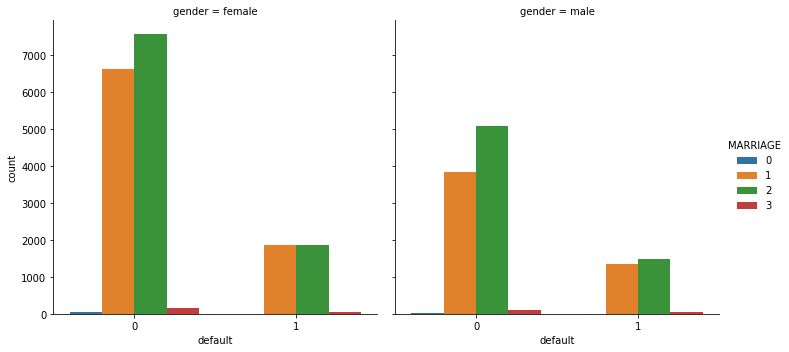

In [66]:
sns.factorplot('default', data=credit_default, hue='MARRIAGE', kind='count', hue_order=range(0,4),
              col='gender')

In [67]:
credit_default.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,2,1,24,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,2,2,26,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,34,0,0,0,0,0,0,0,female,"(30, 40]"
3,2,1,37,0,0,0,0,0,0,0,female,"(30, 40]"
4,2,1,57,-1,0,-1,0,0,0,0,male,"(50, 60]"


C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


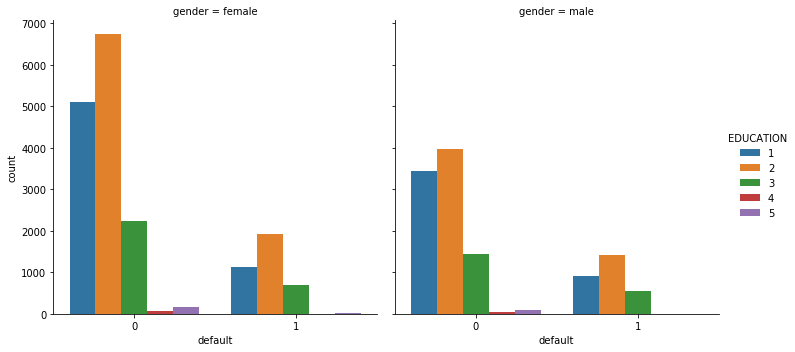

In [68]:
sns.factorplot('default', data=credit_default, hue='EDUCATION', kind='count', hue_order=range(1,6),
              col='gender')

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


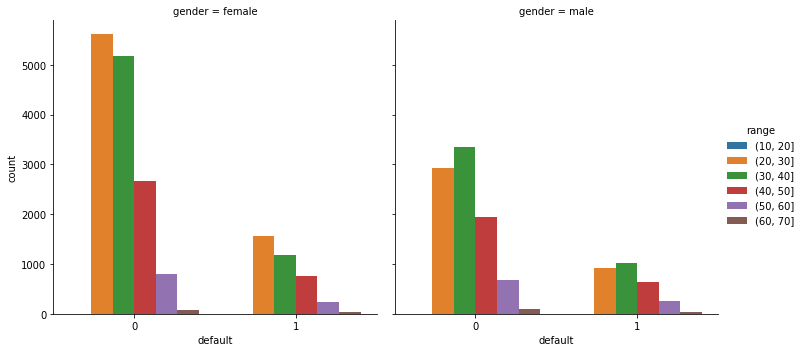

In [69]:
sns.factorplot('default', data=credit_default, hue='range', kind='count',
              col='gender')

C:\Software\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


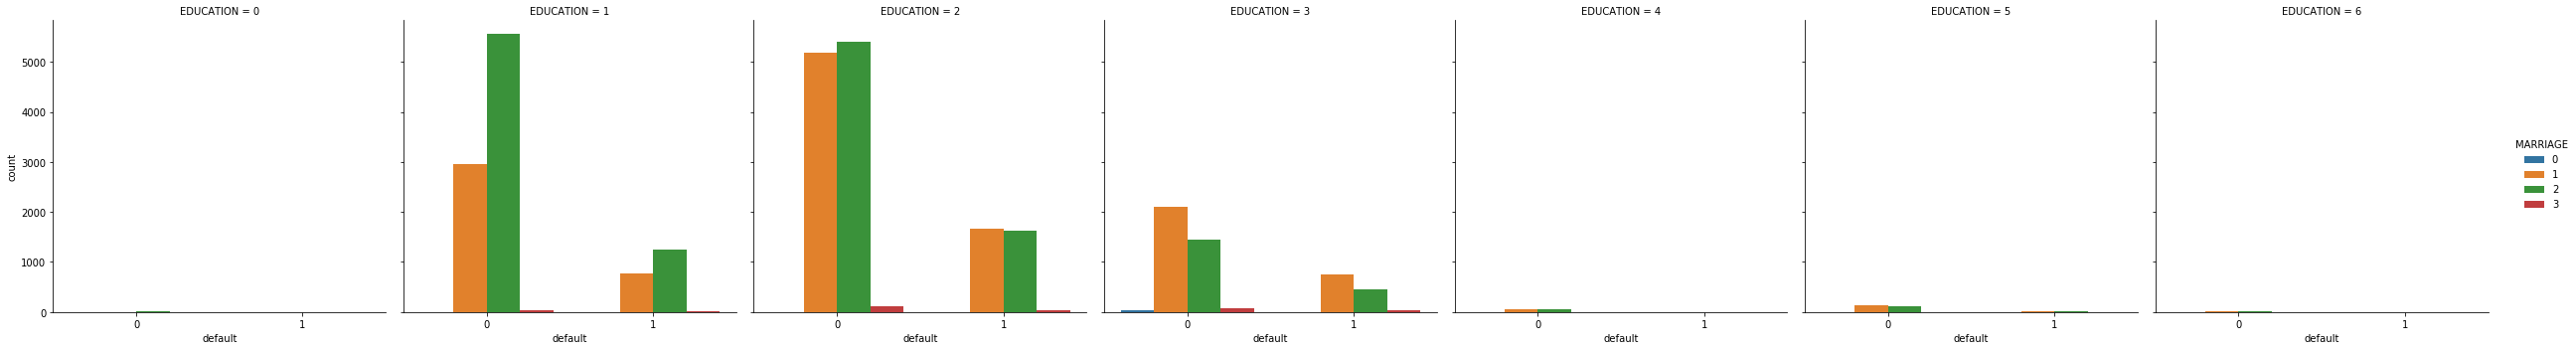

In [70]:
sns.factorplot('default', data=credit_default, hue='MARRIAGE', kind='count',
              col='EDUCATION')

In [71]:
corrMat = credit.corr().abs()
print(corrMat)

                 ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.039177  0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755   0.219161  0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.014232  0.031389  0.090874   
EDUCATION  0.039177   0.219161  0.014232   1.000000  0.143464  0.175061   
MARRIAGE   0.029079   0.108139  0.031389   0.143464  1.000000  0.414170   
AGE        0.018678   0.144713  0.090874   0.175061  0.414170  1.000000   
PAY_0      0.030575   0.271214  0.057643   0.105364  0.019917  0.039447   
PAY_2      0.011215   0.296382  0.070771   0.121566  0.024199  0.050148   
PAY_3      0.018494   0.286123  0.066096   0.114025  0.032688  0.053048   
PAY_4      0.002735   0.267460  0.060173   0.108793  0.033122  0.049722   
PAY_5      0.022199   0.249411  0.055064   0.097520  0.035629  0.053826   
PAY_6      0.020270   0.235195  0.044008   0.082316  0.034345  0.048773   
BILL_AMT1  0.019389   0.2

In [72]:
corrMat = credit.corr().abs().unstack().sort_values(kind="quicksort")
print(corrMat)

PAY_AMT1   SEX          0.000242
SEX        PAY_AMT1     0.000242
EDUCATION  BILL_AMT4    0.000451
BILL_AMT4  EDUCATION    0.000451
ID         PAY_AMT5     0.000652
PAY_AMT5   ID           0.000652
MARRIAGE   PAY_AMT5     0.001205
PAY_AMT5   MARRIAGE     0.001205
PAY_AMT1   PAY_3        0.001295
PAY_3      PAY_AMT1     0.001295
PAY_AMT2   SEX          0.001391
SEX        PAY_AMT2     0.001391
PAY_6      PAY_AMT1     0.001496
PAY_AMT1   PAY_6        0.001496
SEX        PAY_AMT5     0.001667
PAY_AMT5   SEX          0.001667
PAY_AMT2   PAY_4        0.001944
PAY_4      PAY_AMT2     0.001944
SEX        PAY_AMT4     0.002229
PAY_AMT4   SEX          0.002229
PAY_4      ID           0.002735
ID         PAY_4        0.002735
SEX        PAY_AMT6     0.002766
PAY_AMT6   SEX          0.002766
ID         PAY_AMT6     0.003000
PAY_AMT6   ID           0.003000
PAY_5      PAY_AMT2     0.003191
PAY_AMT2   PAY_5        0.003191
MARRIAGE   PAY_AMT3     0.003541
PAY_AMT3   MARRIAGE     0.003541
          

In [73]:
#data
rawdata = pd.read_csv('credit_new1.csv', header=0)
rawdata.head()

,Unnamed: 0,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,0,2,1,24,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,1,2,2,26,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,2,34,0,0,0,0,0,0,0,female,"(30, 40]"
3,3,2,1,37,0,0,0,0,0,0,0,female,"(30, 40]"
4,4,2,1,57,-1,0,-1,0,0,0,0,male,"(50, 60]"


In [47]:
pwd

'C:\\Users\\Anurag Kumra'

In [87]:
rawData=rawdata.drop(rawdata.columns[0],axis=1)


In [88]:

rawData.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender,range
0,2,1,24,2,2,-1,-1,-2,-2,1,female,"(20, 30]"
1,2,2,26,-1,2,0,0,0,2,1,female,"(20, 30]"
2,2,2,34,0,0,0,0,0,0,0,female,"(30, 40]"
3,2,1,37,0,0,0,0,0,0,0,female,"(30, 40]"
4,2,1,57,-1,0,-1,0,0,0,0,male,"(50, 60]"


In [89]:
rawdata=rawData.drop(rawdata.columns[12],axis=1)

In [90]:
rawdata.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender
0,2,1,24,2,2,-1,-1,-2,-2,1,female
1,2,2,26,-1,2,0,0,0,2,1,female
2,2,2,34,0,0,0,0,0,0,0,female
3,2,1,37,0,0,0,0,0,0,0,female
4,2,1,57,-1,0,-1,0,0,0,0,male


In [110]:
def male_female_child(sex):
    #sex = passenger
    
    if sex == 'male':
        return '1'
    else:
        return '0'

In [111]:
rawdata['gender'] = rawdata['gender'].apply(male_female_child)

In [112]:
rawdata.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,gender
0,2,1,24,2,2,-1,-1,-2,-2,1,0
1,2,2,26,-1,2,0,0,0,2,1,0
2,2,2,34,0,0,0,0,0,0,0,0
3,2,1,37,0,0,0,0,0,0,0,0
4,2,1,57,-1,0,-1,0,0,0,0,0


In [113]:
df = rawdata[ [ col for col in rawdata.columns if col != 'default' ] + ['default']]

In [114]:
df.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,gender,default
0,2,1,24,2,2,-1,-1,-2,-2,0,1
1,2,2,26,-1,2,0,0,0,2,0,1
2,2,2,34,0,0,0,0,0,0,0,0
3,2,1,37,0,0,0,0,0,0,0,0
4,2,1,57,-1,0,-1,0,0,0,0,0


In [115]:
#features
features = df.iloc[:,0:10]
print('Summary of feature sample')
features.head()

Summary of feature sample


,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,gender
0,2,1,24,2,2,-1,-1,-2,-2,0
1,2,2,26,-1,2,0,0,0,2,0
2,2,2,34,0,0,0,0,0,0,0
3,2,1,37,0,0,0,0,0,0,0
4,2,1,57,-1,0,-1,0,0,0,0


In [116]:
#dependent variable
depVar = df['default']

In [117]:
#Training Set (Feature Space: X Training)
X_train = (features[: 21000])
X_train.head()


#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()



#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())



#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 21000
The number of observations in the feature testing set is: 9000
       EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
21000          2         1   36      1     -1     -1     -1      0      0   
21001          3         1   40      2      0      0      0      0      0   
21002          2         1   37      0      0      0      0      0      0   
21003          2         2   32      2      0      0      0     -2     -2   
21004          2         2   32      2      0      0      0      0      2   

      gender  
21000      0  
21001      0  
21002      0  
21003      0  
21004      0  
The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default, dtype: int64

In [118]:
from sklearn.cross_validation import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((11812, 10), (3938, 10))

In [121]:
model = LinearRegression(n_jobs=10)

In [122]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [123]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [124]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [125]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [126]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
print(cross_val_score(modelRF, X_train, y_train)) 

[-0.00816643  0.04824712  0.02403949]


In [128]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[-0.00747176  0.05010013  0.01970309]


0.5789172700021248

In [129]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[0.10885586 0.13000974 0.11087857]


0.28356037511062726

In [130]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.10007662 0.11167412 0.10000009]


0.10724365269235914

In [131]:
predictions = modelRF.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [133]:
from math import sqrt

In [134]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [135]:
predRsquared = r2_score(y_test,predictions)

In [136]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.014
RMSE: 0.422


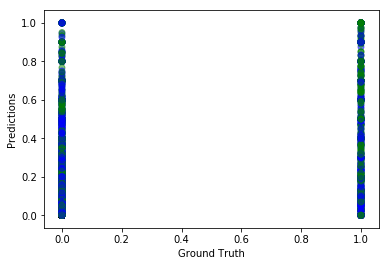

In [137]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();